In [ ]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 34.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd

# Path to the main MIMIC-IV folder
data_path = "MIMIC_IV"

# Find all CSV files in the dataset
csv_files = {}
for root, _, files in os.walk(data_path):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            csv_files[file] = pd.read_csv(file_path)

# Print loaded files
print(f"Loaded {len(csv_files)} CSV files:")
print(csv_files.keys())

Loaded 6 CSV files:
dict_keys(['diagnosis.csv', 'edstays.csv', 'medrecon.csv', 'pyxis.csv', 'triage.csv', 'vitalsign.csv'])


In [ ]:
import pandas as pd

# Replace these with the actual file paths for your CSV files.
edstays = pd.read_csv("MIMIC_IV_datasets/edstays.csv")
diagnosis = pd.read_csv("MIMIC_IV_datasets/diagnosis.csv")
medrecon = pd.read_csv("MIMIC_IV_datasets/medrecon.csv")
pyxis = pd.read_csv("MIMIC_IV_datasets/pyxis.csv")
triage = pd.read_csv("MIMIC_IV_datasets/triage.csv")
vitalsign = pd.read_csv("MIMIC_IV_datasets/vitalsign.csv")

In [ ]:
print("EDStays:", edstays.shape)
print("Diagnosis:", diagnosis.shape)
print("MedRecon:", medrecon.shape)
print("Pyxis:", pyxis.shape)
print("Triage:", triage.shape)
print("VitalSign:", vitalsign.shape)

EDStays: (425087, 9)
Diagnosis: (899050, 6)
MedRecon: (2987342, 9)
Pyxis: (1586053, 7)
Triage: (425087, 11)
VitalSign: (1564610, 11)


**Medrecon Data pre-processing**

In [ ]:
import pandas as pd

# Count the rows where gsn is 0
zero_gsn_count = medrecon[medrecon['gsn'] == 0].shape[0]
print("Number of rows with gsn value 0:", zero_gsn_count)


Number of rows with gsn value 0: 11708


In [ ]:
import numpy as np

medrecon['gsn'] = medrecon['gsn'].replace(0, np.nan)
medrecon['ndc'] = medrecon['ndc'].replace(0, np.nan)

**Converting to Lower-case to make standard format**

In [ ]:
medrecon['name'] = medrecon['name'].str.strip().str.lower()

In [ ]:
medrecon['charttime'] = pd.to_datetime(medrecon['charttime'])

In [ ]:
medrecon.head()

,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090.0,2.169504e+10,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340.0,1.013502e+10,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin d3),65241.0,3.720502e+10,1,670.0,Vitamins - D Derivatives
3,10000032,32952584,2180-07-22 17:26:00,emtricitabine-tenofovir [truvada],57883.0,3.535601e+10,1,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,32952584,2180-07-22 17:26:00,fluticasone [flovent hfa],21251.0,4.999906e+10,1,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


**Edstays data pre-processing**

In [ ]:
edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [ ]:
diagnosis.head()

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [ ]:
pyxis.head()

,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
0,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,1,5037.0
1,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,2,28090.0
2,10000032,35968195,2180-08-05 22:29:00,1,Morphine,1,4080.0
3,10000032,35968195,2180-08-05 22:55:00,2,Donnatol (Elixir),1,4773.0
4,10000032,35968195,2180-08-05 22:55:00,3,Aluminum-Magnesium Hydrox.-Simet,1,2701.0


In [ ]:
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [ ]:
merged_df1 = pd.merge(edstays, diagnosis, on=["subject_id", "stay_id"], how="outer")
merged_df1.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,seq_num,icd_code,icd_version,icd_title
0,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,4589,9.0,HYPOTENSION NOS
1,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,2.0,07070,9.0,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,3.0,V08,9.0,ASYMPTOMATIC HIV INFECTION
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,1.0,5728,9.0,"OTH SEQUELA, CHR LIV DIS"
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,2.0,78959,9.0,OTHER ASCITES


In [ ]:
merged_df2 = pd.merge(merged_df1, triage, on=["subject_id", "stay_id"], how="outer")
merged_df2.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,seq_num,...,icd_title,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,2.0,...,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
2,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,3.0,...,ASYMPTOMATIC HIV INFECTION,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
3,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,1.0,...,"OTH SEQUELA, CHR LIV DIS",98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
4,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,2.0,...,OTHER ASCITES,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"


In [ ]:
final_df = pd.merge(merged_df2, medrecon, on=["subject_id", "stay_id"], how="outer")
final_df.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,seq_num,...,pain,acuity,chiefcomplaint,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,7,2.0,Hypotension,2180-07-22 17:26:00,albuterol sulfate,28090.0,2.169504e+10,1.0,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,7,2.0,Hypotension,2180-07-22 17:26:00,calcium carbonate,1340.0,1.013502e+10,1.0,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,7,2.0,Hypotension,2180-07-22 17:26:00,cholecalciferol (vitamin d3),65241.0,3.720502e+10,1.0,670.0,Vitamins - D Derivatives
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,7,2.0,Hypotension,2180-07-22 17:26:00,emtricitabine-tenofovir [truvada],57883.0,3.535601e+10,1.0,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,1.0,...,7,2.0,Hypotension,2180-07-22 17:26:00,fluticasone [flovent hfa],21251.0,4.999906e+10,1.0,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [ ]:
final_df.shape

(7195726, 29)

In [ ]:
final_df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender',
       'race', 'arrival_transport', 'disposition', 'seq_num', 'icd_code',
       'icd_version', 'icd_title', 'temperature', 'heartrate', 'resprate',
       'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint', 'charttime',
       'name', 'gsn', 'ndc', 'etc_rn', 'etccode', 'etcdescription'],
      dtype='object')

In [ ]:
# List of columns to drop
columns_to_drop = [    'intime', 'outtime', 'race', 'ndc', 'etc_rn', 'etccode',
                   'arrival_transport', 'disposition', 'icd_version', 'seq_num', 'pain', 'acuity', 'charttime']

# Dropping the columns from the DataFrame
df = final_df.drop(columns=columns_to_drop)

df.head()

,subject_id,hadm_id,stay_id,gender,icd_code,icd_title,temperature,heartrate,resprate,o2sat,sbp,dbp,chiefcomplaint,name,gsn,etcdescription
0,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,albuterol sulfate,28090.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,calcium carbonate,1340.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,cholecalciferol (vitamin d3),65241.0,Vitamins - D Derivatives
3,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,emtricitabine-tenofovir [truvada],57883.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,fluticasone [flovent hfa],21251.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [ ]:
df.shape

(7195726, 16)

In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'gender', 'icd_code', 'icd_title',
       'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp',
       'chiefcomplaint', 'name', 'gsn', 'etcdescription'],
      dtype='object')

In [ ]:
# Find unique ICD codes in the dataset
unique_icd_codes = df['icd_code'].unique()

# Display the unique ICD codes
print(unique_icd_codes)



['4589' '07070' 'V08' ... '80035' '80135' '80425']


In [ ]:
# Count the number of unique ICD codes
num_unique_icd_codes = df['icd_code'].nunique()

# Display the count
print(f"Number of unique ICD codes: {num_unique_icd_codes}")


Number of unique ICD codes: 13199


In [ ]:
# Count the frequency of each ICD code
icd_code_counts = df['icd_code'].value_counts()

# Display the frequency of ICD codes
print(icd_code_counts)


icd_code
4019       284070
I10        208169
25000      162618
E119       111781
R079       108305
            ...  
73341           1
E9190           1
S158XXA         1
W5381XA         1
N62             1
Name: count, Length: 13199, dtype: int64


In [ ]:
df['icd_category'] = df['icd_code'].str[:3]  # First 3 characters

In [ ]:
df['icd_category']

0          458
1          458
2          458
3          458
4          458
          ... 
7195721    Z79
7195722    Z79
7195723    Z79
7195724    R41
7195725    431
Name: icd_category, Length: 7195726, dtype: object

In [ ]:
df.head()

,subject_id,hadm_id,stay_id,gender,icd_code,icd_title,temperature,heartrate,resprate,o2sat,sbp,dbp,chiefcomplaint,name,gsn,etcdescription,icd_category
0,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,albuterol sulfate,28090.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...,458
1,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,calcium carbonate,1340.0,Minerals and Electrolytes - Calcium Replacement,458
2,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,cholecalciferol (vitamin d3),65241.0,Vitamins - D Derivatives,458
3,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,emtricitabine-tenofovir [truvada],57883.0,Antiretroviral - Nucleoside and Nucleotide Ana...,458
4,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,fluticasone [flovent hfa],21251.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...,458


In [ ]:
df.shape

(7195726, 17)

In [ ]:
df.to_csv("merged_mimic_IV.csv", index=False)
print("Merged data saved successfully!")


Merged data saved successfully!


In [ ]:
import pandas as pd

# Load your final dataset
final_df = pd.read_csv("merged_mimic_IV.csv")  # Replace with your actual file path

# Display the first few rows
final_df.head()


,subject_id,hadm_id,stay_id,gender,icd_code,icd_title,temperature,heartrate,resprate,o2sat,sbp,dbp,chiefcomplaint,name,gsn,etcdescription,icd_category
0,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,albuterol sulfate,28090.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...,458
1,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,calcium carbonate,1340.0,Minerals and Electrolytes - Calcium Replacement,458
2,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,cholecalciferol (vitamin d3),65241.0,Vitamins - D Derivatives,458
3,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,emtricitabine-tenofovir [truvada],57883.0,Antiretroviral - Nucleoside and Nucleotide Ana...,458
4,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,71.0,43.0,Hypotension,fluticasone [flovent hfa],21251.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...,458


In [ ]:
import pandas as pd

column_names = ["chapter", "subcode", "icd_code", "long_desc", "short_desc", "category"]
icd_df = pd.read_csv("ICD10codes.csv", names=column_names, header=None)


In [ ]:
icd_df.head()

,chapter,subcode,icd_code,long_desc,short_desc,category
0,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol...",Cholera
1,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
2,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
3,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
4,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever


In [ ]:
icd_df.to_csv("icd_codes.csv", index=False)
print("icd codes with column names saved successfully!")


icd codes with column names saved successfully!


In [ ]:
# Merge the data on the icd_code column
merged_df = final_df.merge(icd_df, on="icd_code", how="left")

# Display a few rows to check the result
merged_df.head()


,subject_id,hadm_id,stay_id,gender,icd_code,icd_title,temperature,heartrate,resprate,o2sat,...,chiefcomplaint,name,gsn,etcdescription,icd_category,chapter,subcode,long_desc,short_desc,category
0,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,...,Hypotension,albuterol sulfate,28090.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...,458,NaN,NaN,NaN,NaN,NaN
1,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,...,Hypotension,calcium carbonate,1340.0,Minerals and Electrolytes - Calcium Replacement,458,NaN,NaN,NaN,NaN,NaN
2,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,...,Hypotension,cholecalciferol (vitamin d3),65241.0,Vitamins - D Derivatives,458,NaN,NaN,NaN,NaN,NaN
3,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,...,Hypotension,emtricitabine-tenofovir [truvada],57883.0,Antiretroviral - Nucleoside and Nucleotide Ana...,458,NaN,NaN,NaN,NaN,NaN
4,10000032,29079034.0,32952584,F,4589,HYPOTENSION NOS,97.8,87.0,14.0,97.0,...,Hypotension,fluticasone [flovent hfa],21251.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...,458,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'gender', 'icd_code', 'icd_title',
       'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp',
       'chiefcomplaint', 'name', 'gsn', 'etcdescription', 'icd_category',
       'chapter', 'subcode', 'long_desc', 'short_desc', 'category'],
      dtype='object')

In [ ]:
# Count unique admissions (or rows) per ICD category
grouped_by_icd_category = merged_df.groupby('icd_category').agg({
    'hadm_id': 'nunique'  # or 'count' if you want the total rows per category
}).rename(columns={'hadm_id': 'unique_admissions'})

print("Grouped by ICD Category:")
grouped_by_icd_category


Grouped by ICD Category:


,unique_admissions
icd_category,
002,1
003,1
005,0
007,3
008,117
...,...
Z95,123
Z96,55
Z97,2


In [ ]:
# Group by chapter and count unique admissions
grouped_by_chapter = merged_df.groupby('chapter').agg({'hadm_id': 'nunique'}).rename(columns={'hadm_id': 'unique_admissions'})

# Sum of all grouped rows should equal the total number of rows in the DataFrame
total_grouped_rows = grouped_by_chapter.sum()
total_rows = merged_df.shape[0]

print("Total rows in grouping:", total_grouped_rows)
print("Total rows in DataFrame:", total_rows)

Total rows in grouping: unique_admissions    192691
dtype: int64
Total rows in DataFrame: 7195726


In [ ]:
# Count rows where the chapter value is missing (NaN)
missing_chapter_count = merged_df['chapter'].isnull().sum()

# Count rows where the chapter value is an empty string (if applicable)
empty_chapter_count = (merged_df['chapter'].astype(str).str.strip() == "").sum()

print("Rows with missing chapter (NaN):", missing_chapter_count)
print("Rows with empty chapter:", empty_chapter_count)


Rows with missing chapter (NaN): 3574270
Rows with empty chapter: 0


In [ ]:
import pandas as pd

def reformat_icd9(icd_str):

    # If a dot is already present, return as is.
    if '.' in icd_str:
        return icd_str
    # Remove any leading/trailing whitespace.
    icd_str = icd_str.strip()
    # For codes with 3 or more digits, insert a dot after the third digit.
    if len(icd_str) > 2:
        return icd_str[:3] + '.' + icd_str[3:]
    else:
        return icd_str

def infer_icd_chapter(icd_code):
    """
    Infers the ICD chapter (broad category) for a given ICD code,
    handling both ICD-10 (alphabetic codes) and ICD-9 (numeric codes).
    For ICD-9 codes without a decimal, the function inserts one before conversion.
    """
    if pd.isna(icd_code):
        return None

    # Convert code to string and strip whitespace
    icd_str = str(icd_code).strip()
    if not icd_str:
        return 'Other'

    # Special handling: if code starts with "R" followed by digits, process the numeric part
    if icd_str[0].upper() == 'R' and icd_str[1:].replace('.', '', 1).isdigit():
        numeric_part = icd_str[1:]
        # Optionally reformat the numeric part if needed (using your helper function)
        icd_str_reformatted = reformat_icd9(numeric_part)
        try:
            code_num = float(icd_str_reformatted.split('.')[0])
        except ValueError:
            return 'Other'

        # Use ICD-9 numeric ranges for categorization
        if 1 <= code_num <= 139:
            return 'Infectious and parasitic diseases'
        elif 140 <= code_num <= 239:
            return 'Neoplasms'
        elif 240 <= code_num <= 279:
            return 'Endocrine, nutritional and metabolic diseases'
        elif 280 <= code_num <= 289:
            return 'Diseases of the blood and blood-forming organs'
        elif 290 <= code_num <= 319:
            return 'Mental disorders'
        elif 320 <= code_num <= 389:
            return 'Diseases of the nervous system and sense organs'
        elif 390 <= code_num <= 459:
            return 'Diseases of the circulatory system'
        elif 460 <= code_num <= 519:
            return 'Diseases of the respiratory system'
        elif 520 <= code_num <= 579:
            return 'Diseases of the digestive system'
        elif 580 <= code_num <= 629:
            return 'Diseases of the genitourinary system'
        elif 630 <= code_num <= 677:
            return 'Complications of pregnancy, childbirth and the puerperium'
        elif 680 <= code_num <= 709:
            return 'Diseases of the skin and subcutaneous tissue'
        elif 710 <= code_num <= 739:
            return 'Diseases of the musculoskeletal system and connective tissue'
        elif 740 <= code_num <= 759:
            return 'Congenital anomalies'
        elif 760 <= code_num <= 779:
            return 'Certain conditions originating in the perinatal period'
        elif 780 <= code_num <= 789:
            if code_num == 780:
                return "General symptoms"
            elif code_num == 781:
                return "Symptoms involving nervous and musculoskeletal systems"
            elif code_num == 782:
                return "Symptoms involving skin and other integumentary tissue"
            elif code_num == 783:
                return "Symptoms concerning nutrition metabolism and development"
            elif code_num == 784:
                return "Symptoms involving head and neck"
            elif code_num == 785:
                return "Symptoms involving cardiovascular system"
            elif code_num == 786:
                return "Symptoms involving respiratory system and other chest symptoms"
            elif code_num == 787:
                return "Symptoms involving digestive system"
            elif code_num == 788:
                return "Symptoms involving urinary system"
            elif code_num == 789:
                return "Other symptoms involving abdomen and pelvis"
        elif 790 <= code_num <= 796:
            if code_num == 790:
                return "Nonspecific findings on examination of blood"
            elif code_num == 791:
                return "Nonspecific findings on examination of urine"
            elif code_num == 792:
                return "Nonspecific abnormal findings in other body substances"
            elif code_num == 793:
                return "Nonspecific abnormal (findings) on radiological and other examination of body structure"
            elif code_num == 794:
                return "Nonspecific abnormal results of function studies"
            elif code_num == 795:
                return "Other and nonspecific abnormal cytological, histological, immunological, and dna test findings"
            elif code_num == 796:
                return "Other nonspecific abnormal findings"
        elif 797 <= code_num <= 799:
            if code_num == 797:
                return "Senility without mention of psychosis"
            elif code_num == 798:
                return "Sudden death cause unknown"
            elif code_num == 799:
                return "Other ill-defined and unknown causes of morbidity and mortality"
        elif 800 <= code_num <= 999:
            return 'Injury and poisoning'
        else:
            return 'Other'

    # Check if it's ICD-10 (alphabetic)
    if icd_str[0].isalpha():
        mapping_icd10 = {
            'A': 'Certain infectious and parasitic diseases',
            'B': 'Certain infectious and parasitic diseases',
            'C': 'Neoplasms',
            'D': 'Neoplasms / Blood diseases',  # Adjust as needed
            'E': 'Endocrine, nutritional and metabolic diseases',
            'F': 'Mental and behavioural disorders',
            'G': 'Diseases of the nervous system',
            'H': 'Diseases of the eye and adnexa',
            'I': 'Diseases of the circulatory system',
            'J': 'Diseases of the respiratory system',
            'K': 'Diseases of the digestive system',
            'L': 'Diseases of the skin and subcutaneous tissue',
            'M': 'Diseases of the musculoskeletal system and connective tissue',
            'N': 'Diseases of the genitourinary system',
            'O': 'Pregnancy, childbirth and the puerperium',
            'P': 'Certain conditions originating in the perinatal period',
            'Q': 'Congenital malformations, deformations and chromosomal abnormalities',
            'R': 'Symptoms, signs and abnormal clinical findings',
            'S': 'Injury, poisoning and certain other consequences of external causes',
            'T': 'Injury, poisoning and certain other consequences of external causes',
            'V': 'External causes of morbidity and mortality',
            'W': 'External causes of morbidity and mortality',
            'X': 'External causes of morbidity and mortality',
            'Y': 'External causes of morbidity and mortality',
            'Z': 'Factors influencing health status and contact with health services'
        }
        return mapping_icd10.get(icd_str[0], 'Other')
    else:
        # It's ICD-9. Reformat if necessary.
        icd_str_reformatted = reformat_icd9(icd_str)
        try:
            # Convert the part before any decimal to a float.
            code_num = float(icd_str_reformatted.split('.')[0])
        except ValueError:
            return 'Other'

        # Map numeric ranges according to common ICD-9 groupings:
        if 1 <= code_num <= 139:
            return 'Infectious and parasitic diseases'
        elif 140 <= code_num <= 239:
            return 'Neoplasms'
        elif 240 <= code_num <= 279:
            return 'Endocrine, nutritional and metabolic diseases'
        elif 280 <= code_num <= 289:
            return 'Diseases of the blood and blood-forming organs'
        elif 290 <= code_num <= 319:
            return 'Mental disorders'
        elif 320 <= code_num <= 389:
            return 'Diseases of the nervous system and sense organs'
        elif 390 <= code_num <= 459:
            return 'Diseases of the circulatory system'
        elif 460 <= code_num <= 519:
            return 'Diseases of the respiratory system'
        elif 520 <= code_num <= 579:
            return 'Diseases of the digestive system'
        elif 580 <= code_num <= 629:
            return 'Diseases of the genitourinary system'
        elif 630 <= code_num <= 677:
            return 'Complications of pregnancy, childbirth and the puerperium'
        elif 680 <= code_num <= 709:
            return 'Diseases of the skin and subcutaneous tissue'
        elif 710 <= code_num <= 739:
            return 'Diseases of the musculoskeletal system and connective tissue'
        elif 740 <= code_num <= 759:
            return 'Congenital anomalies'
        elif 760 <= code_num <= 779:
            return 'Certain conditions originating in the perinatal period'
        elif 780 <= code_num <= 789:
            # Symptoms (ICD-9 780–789)
            if code_num == 780:
                return "General symptoms"
            elif code_num == 781:
                return "Symptoms involving nervous and musculoskeletal systems"
            elif code_num == 782:
                return "Symptoms involving skin and other integumentary tissue"
            elif code_num == 783:
                return "Symptoms concerning nutrition metabolism and development"
            elif code_num == 784:
                return "Symptoms involving head and neck"
            elif code_num == 785:
                return "Symptoms involving cardiovascular system"
            elif code_num == 786:
                return "Symptoms involving respiratory system and other chest symptoms"
            elif code_num == 787:
                return "Symptoms involving digestive system"
            elif code_num == 788:
                return "Symptoms involving urinary system"
            elif code_num == 789:
                return "Other symptoms involving abdomen and pelvis"
        elif 790 <= code_num <= 796:
            # Nonspecific abnormal findings (ICD-9 790–796)
            if code_num == 790:
                return "Nonspecific findings on examination of blood"
            elif code_num == 791:
                return "Nonspecific findings on examination of urine"
            elif code_num == 792:
                return "Nonspecific abnormal findings in other body substances"
            elif code_num == 793:
                return "Nonspecific abnormal (findings) on radiological and other examination of body structure"
            elif code_num == 794:
                return "Nonspecific abnormal results of function studies"
            elif code_num == 795:
                return "Other and nonspecific abnormal cytological, histological, immunological, and dna test findings"
            elif code_num == 796:
                return "Other nonspecific abnormal findings"
        elif 797 <= code_num <= 799:
            # Ill-defined and unknown causes of morbidity and mortality (ICD-9 797–799)
            if code_num == 797:
                return "Senility without mention of psychosis"
            elif code_num == 798:
                return "Sudden death cause unknown"
            elif code_num == 799:
                return "Other ill-defined and unknown causes of morbidity and mortality"
        elif 800 <= code_num <= 999:
            return 'Injury and poisoning'
        else:
            return 'Other'

# Apply the function to your merged DataFrame (assuming the ICD code column is named 'icd_code')
merged_df['icd_chapter_combined'] = merged_df['icd_code'].apply(infer_icd_chapter)

# Check the distribution of the combined ICD chapters
print(merged_df['icd_chapter_combined'].value_counts())


icd_chapter_combined
Symptoms, signs and abnormal clinical findings                          1048540
Endocrine, nutritional and metabolic diseases                            967561
Diseases of the circulatory system                                       934072
Symptoms, signs and ill-defined conditions                               790898
External causes of morbidity and mortality                               523655
Diseases of the musculoskeletal system and connective tissue             407975
Diseases of the genitourinary system                                     360796
Diseases of the digestive system                                         317507
Diseases of the respiratory system                                       303453
Injury, poisoning and certain other consequences of external causes      258788
Injury and poisoning                                                     255489
Factors influencing health status and contact with health services       221869
Diseases of the ski

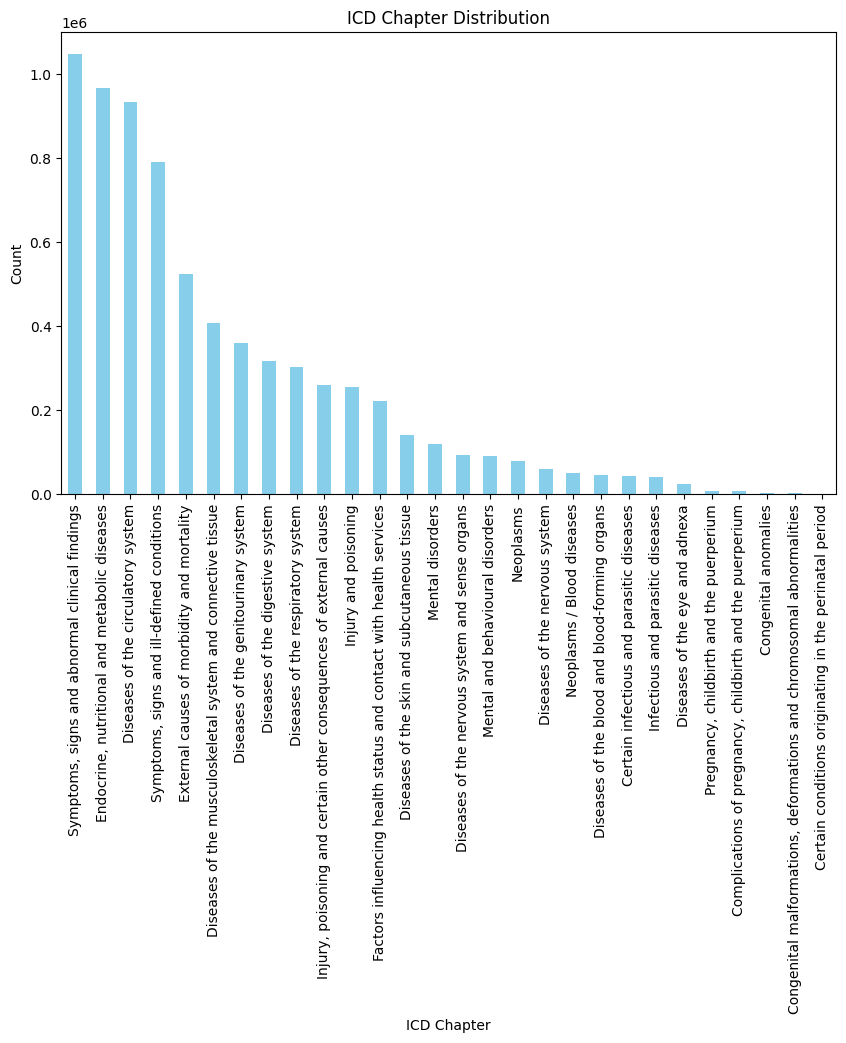

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of ICD categories
category_counts = merged_df['icd_chapter_combined'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('ICD Chapter Distribution')
plt.xlabel('ICD Chapter')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()